<a href="https://colab.research.google.com/github/pavaluri/Books-Machine-Learning-and-data-Science/blob/main/Strength_of_concerte_Regression_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from collections import Counter
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly


#Regressions
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import RepeatedStratifiedKFold

#Model evaluation tools
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

#Data processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")



In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/concrete.csv")
data.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [ ]:
data

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [ ]:
data.shape

(1030, 9)

In [ ]:
categorical_columns = ['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg','fineagg	']

In [ ]:
data.dtypes


cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [ ]:
correlation_mat = data.corr()

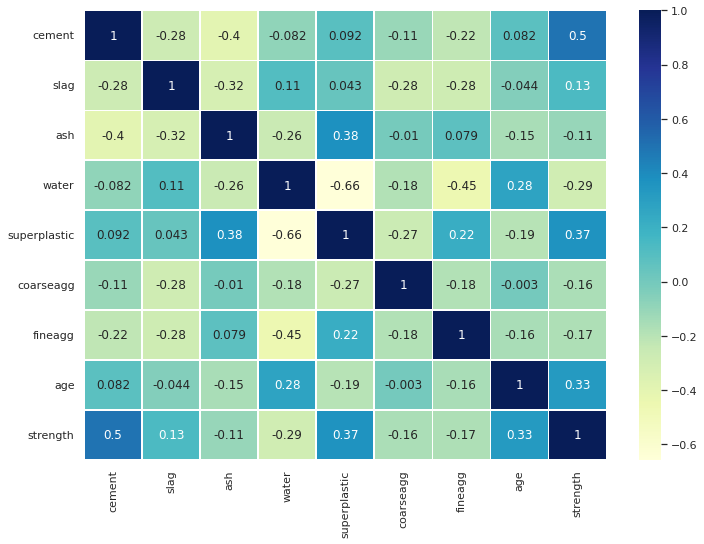

In [ ]:
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

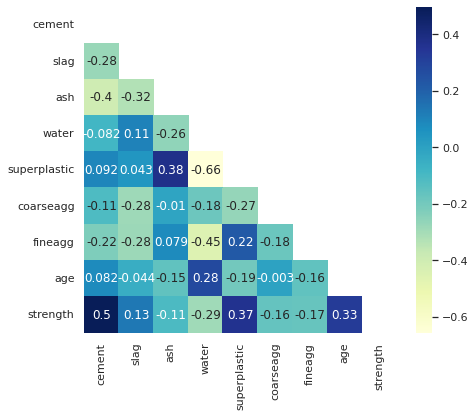

In [ ]:
mask = np.zeros_like(correlation_mat)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7,6))
    ax = sns.heatmap(correlation_mat,
mask=mask,annot=True,cmap="YlGnBu")

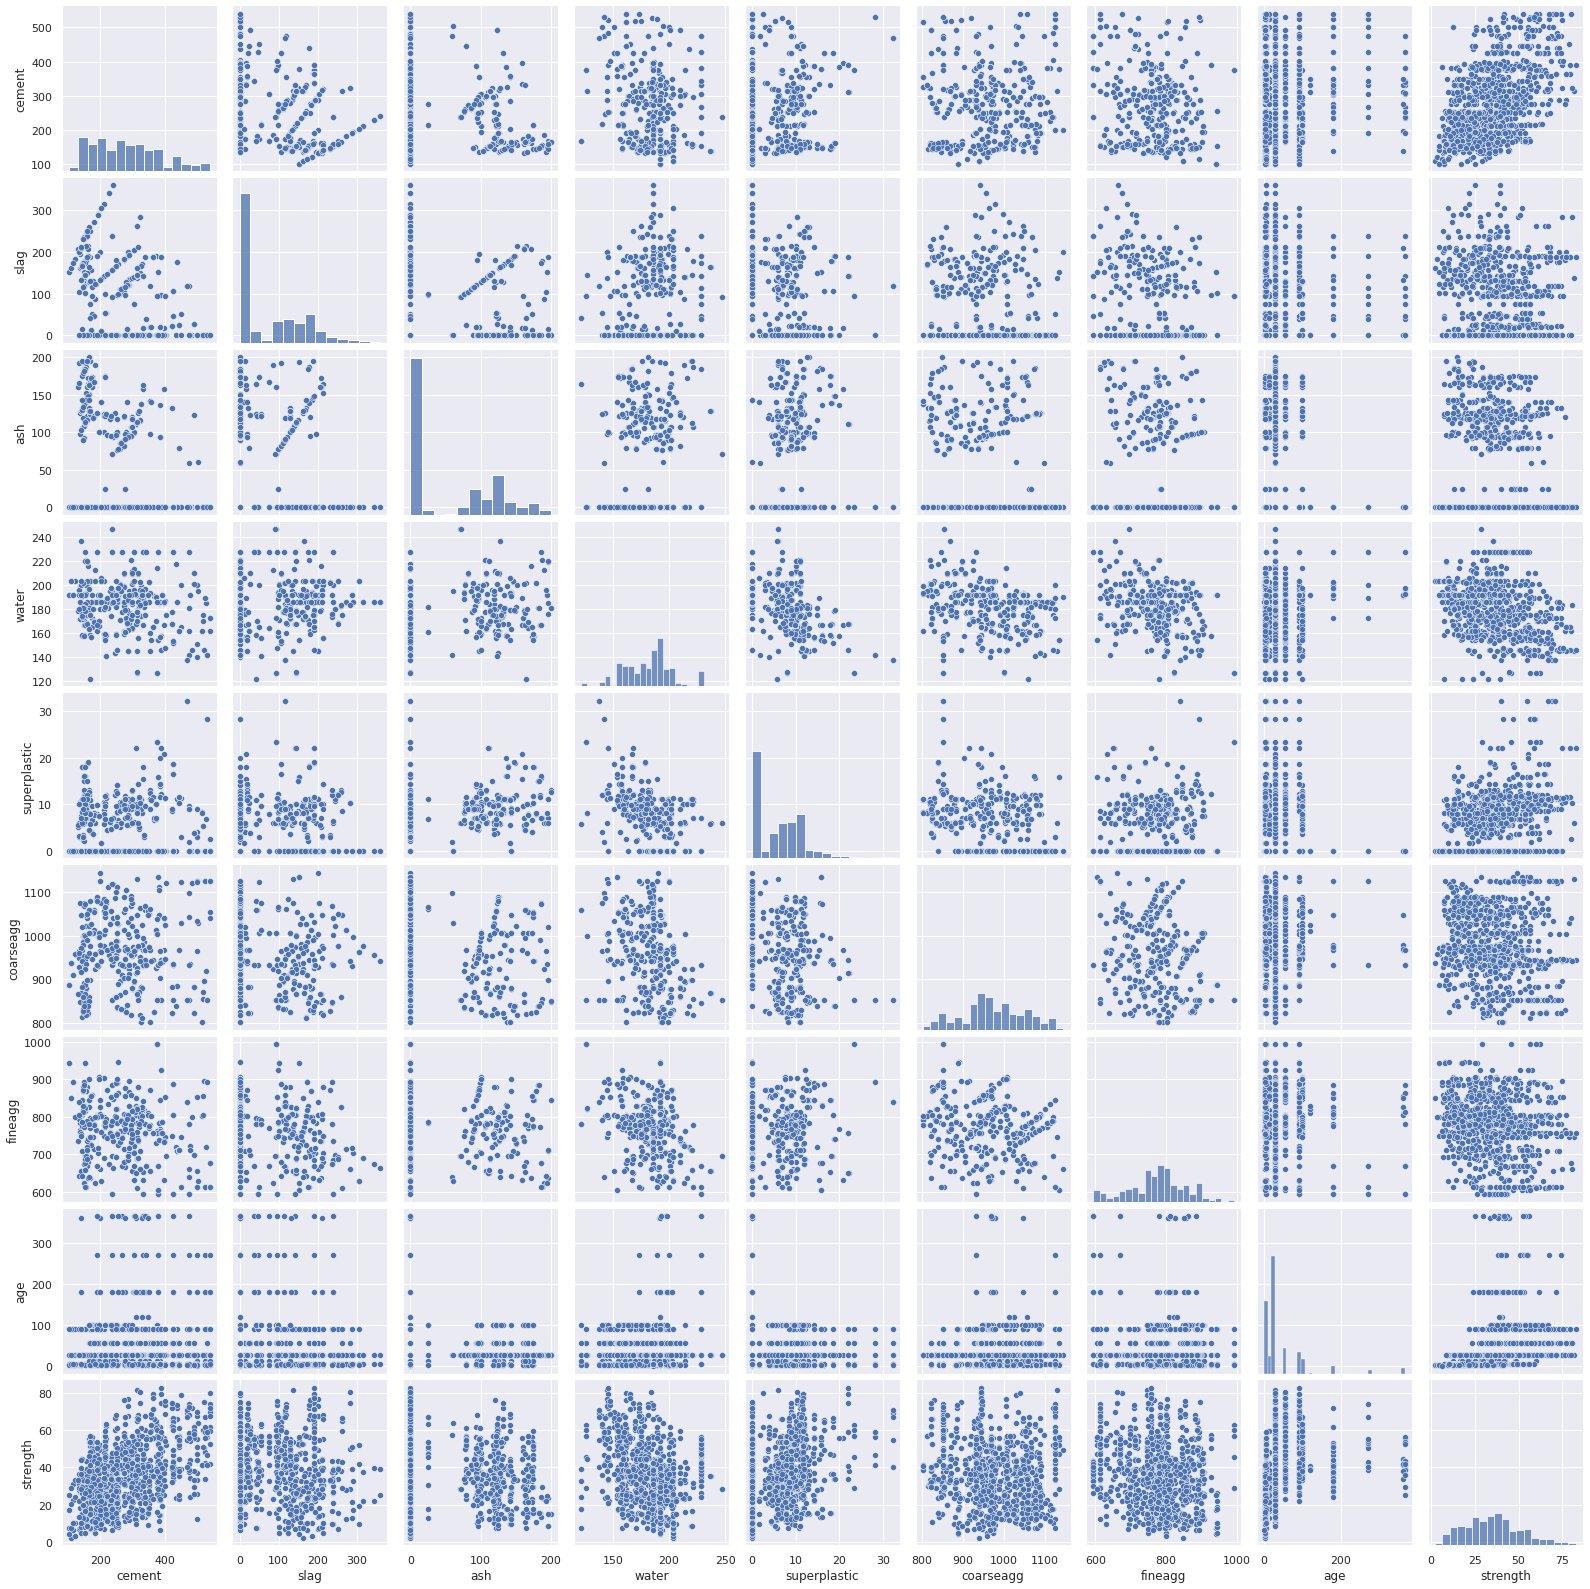

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [ ]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

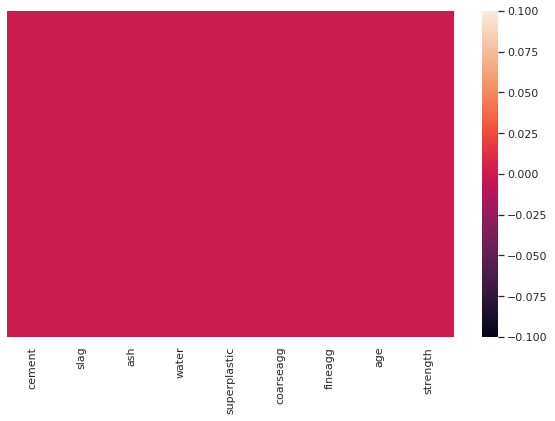

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(),yticklabels=False)

In [ ]:
### Checking if the non-categorical variables are Normally Distributed or Not. i.e. Checking outliers...

print("Data distribution analysis:->---------------------------------------\n")
print("\nMean:->\n")
print("age: ",np.mean(data["age"]))
print("strength: ",np.mean(data["strength"]))

print("\nMode:->\n")
print("age: ",stats.mode(data["age"])[0])
print("strength: ",stats.mode(data["strength"])[0])

print("\nMedian:->\n")
print("age: ",np.median(data["age"]))
print("strength: ",np.median(data["strength"]))


print("\nStandard Deviation:->\n")
print("age: ",np.std(data["age"]))
print("strength: ",np.std(data["strength"]))


Data distribution analysis:->---------------------------------------


Mean:->

age:  45.662135922330094
strength:  35.817961165048544

Mode:->

age:  [28]
strength:  [33.4]

Median:->

age:  28.0
strength:  34.445

Standard Deviation:->

age:  63.13923912883281
strength:  16.697630409134263


In [ ]:
fig = px.histogram(data["age"],x ="age" ,y = "age" )
fig.update_layout(title="age")
fig.show()

fig = px.histogram(data["strength"],x ="strength" ,y = "strength" )
fig.update_layout(title="strength")
fig.show()




In [ ]:
# As You can see in the figure data is not normal distributed

In [ ]:
#Getting log value :->

data["age"] = np.log(data["age"])


In [ ]:
print("---------------------------After converting to Normal Distributed data----------------------")

print("\nMean:->\n")
print("age: ",np.mean(data["age"]))
print("strength: ",np.mean(data["strength"]))


print("\nMode:->\n")
print("age: ",stats.mode(data["age"])[0])
print("strength: ",stats.mode(data["strength"])[0])


print("\nMedian:->\n")
print("age: ",np.median(data["age"]))
print("strength: ",np.median(data["strength"]))


print("\nStandard Deviation:->\n")
print("age: ",np.std(data["age"]))
print("strength: ",np.std(data["strength"]))


---------------------------After converting to Normal Distributed data----------------------

Mean:->

age:  3.165325929660111
strength:  35.817961165048544

Mode:->

age:  [3.33220451]
strength:  [33.4]

Median:->

age:  3.332204510175204
strength:  34.445

Standard Deviation:->

age:  1.1908714335994082
strength:  16.697630409134263


In [ ]:
plt.figure(figsize=(10,4))
fig = px.histogram(data["age"],x ="age" ,y = "age" )
fig.update_layout(title="age")
fig.show()

fig = px.histogram(data["strength"],x ="strength" ,y = "strength" )
fig.update_layout(title="strength")
fig.show()



<Figure size 720x288 with 0 Axes>

In [ ]:
# as You can see we are getting bell curve that means data is normally distributed

In [ ]:
data.head(5)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,3.332205,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,2.639057,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,3.332205,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,3.332205,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,3.332205,18.29


In [ ]:
#Dividing data into Input X variables and Target Y variable
X = data.drop(["strength","cement"],axis=1)
y = data["strength"]

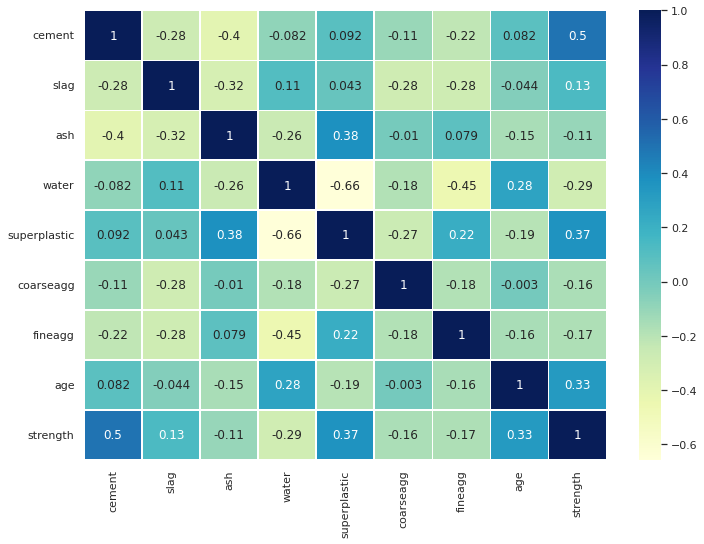

In [ ]:
#Heat map of dataset with relative importance
sns.heatmap(correlation_mat,annot=True,linewidths=.5,cmap="YlGnBu")

In [ ]:
# It seems cement with strength, slag with strength,superplastic with strength are correlated

In [ ]:
#Experiment 1: Only Scaled data with all variables


X = data.drop(["strength","cement"],axis=1)
y = data["strength"]
counter = Counter(y)
print("Counter: ",counter)

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#Scaling data here:------------->

StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

#Check mean is 0 and Standard deviation is 1
print("After Standardization\nMean ",np.mean(X_train),"Standard Deviation ",np.std(X_train),"\n")


Counter:  Counter({33.4: 6, 23.52: 4, 41.05: 4, 35.3: 4, 71.3: 4, 31.35: 4, 77.3: 4, 79.3: 4, 65.2: 3, 33.8: 3, 44.52: 3, 17.54: 3, 39.0: 3, 37.27: 3, 39.3: 3, 35.23: 3, 28.63: 3, 55.9: 3, 12.18: 3, 18.13: 3, 44.28: 3, 64.9: 3, 41.54: 3, 32.72: 3, 40.86: 3, 42.13: 3, 40.93: 3, 49.2: 3, 37.43: 3, 60.29: 3, 43.7: 3, 64.3: 3, 46.23: 3, 25.18: 3, 21.86: 2, 28.99: 2, 36.35: 2, 27.92: 2, 25.1: 2, 45.3: 2, 23.74: 2, 37.91: 2, 47.71: 2, 24.28: 2, 37.42: 2, 20.73: 2, 54.9: 2, 44.3: 2, 26.92: 2, 45.08: 2, 36.94: 2, 19.42: 2, 32.96: 2, 36.8: 2, 9.74: 2, 27.68: 2, 37.36: 2, 23.79: 2, 43.57: 2, 46.68: 2, 33.72: 2, 29.59: 2, 11.47: 2, 23.84: 2, 17.24: 2, 35.34: 2, 43.38: 2, 14.2: 2, 22.44: 2, 52.91: 2, 18.03: 2, 29.07: 2, 52.2: 2, 24.0: 2, 29.87: 2, 40.15: 2, 26.86: 2, 49.77: 2, 65.91: 2, 12.46: 2, 33.76: 2, 43.58: 2, 26.23: 2, 39.38: 2, 37.92: 2, 51.04: 2, 55.55: 2, 15.42: 2, 19.77: 2, 24.1: 2, 13.46: 2, 17.96: 2, 33.42: 2, 19.69: 2, 33.73: 2, 45.37: 2, 53.52: 2, 37.81: 2, 33.7: 2, 33.69: 2, 56.14:

In [ ]:
from numpy.ma.extras import average
#Voting ensemble mathod. Combining all tree based algorithms.
models = []
models.append(("RF",RandomForestRegressor()))
models.append(("DT",DecisionTreeRegressor()))
models.append(("LR",LinearRegression()))

Model1 = RandomForestRegressor()
Model1.fit(X_train, y_train)
a=Model1.score(X_train,y_train)
b=Model1.score(X_test,y_test)
print("Accuracy of RandomForest Regression is:>",((a+b)/2))

Model2 = DecisionTreeRegressor()
Model2.fit(X_train, y_train)
e=Model2.score(X_train,y_train)
f=Model2.score(X_test,y_test)
print("Accuracy of Decision Tree Regression is:>",((e+f)/2))

Model3 = LinearRegression()
Model3.fit(X_train, y_train)
g=Model3.score(X_train,y_train)
h=Model3.score(X_test,y_test)
print("Accuracy of Linear Regression is:>",((g+h)/2))







Accuracy of RandomForest Regression is:> 0.9069839340957435
Accuracy of Decision Tree Regression is:> 0.8640381874533395
Accuracy of Linear Regression is:> 0.7101789800409912


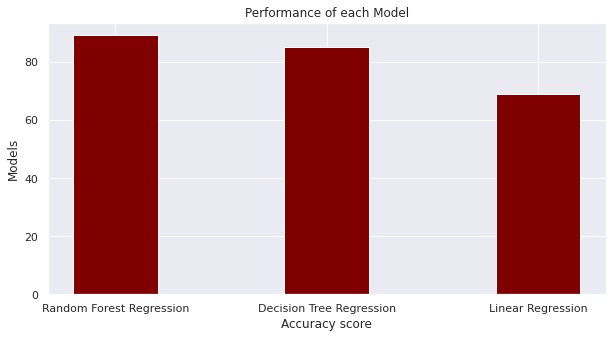

In [ ]:
data = {'Random Forest Regression':89, 'Decision Tree Regression':85, 'Linear Regression':69}
Models = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(Models, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Accuracy score")
plt.ylabel("Models")
plt.title("Performance of each Model")
plt.show()

In [1]:
# as You can see Random Forest regression will give an idea to find the strength of the concerte . As its performance is high.